In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'D:\CS5380\Project\wine.csv')

In [3]:
df.shape

(178, 14)

In [4]:
X = df.drop('Class Type', axis=1).values
y = df['Class Type'].values

In [5]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [8]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

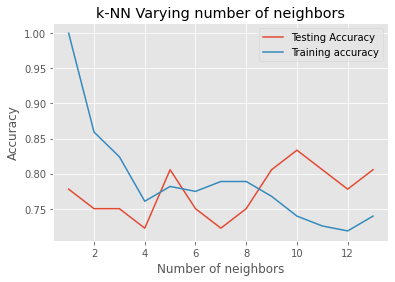

In [9]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=10)

In [11]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.8333333333333334

In [13]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [14]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [15]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  9,  5],
       [ 1,  0,  9]], dtype=int64)

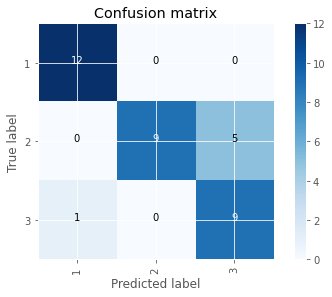

In [16]:
import math 
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test,y_pred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['1', '2', '3'])